# IMDB Score Final Project Regression Analysis

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."
Jessica Davis

In [4]:
import pandas as pd
import numpy as np
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
#Set Display Format
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#remove warnings to keep dataset clean
import warnings
warnings.filterwarnings('ignore')

In [7]:
#read dataset
df1 = pd.read_csv('data/imdb_transformed')

In [8]:
#preview dataset
df1.head(2)

,Unnamed: 0,duration,budget,imdb_score,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War,actor_popularity,director_popularity
0,0,178.0,237000000.0,7.9,0,0,1,0,0,0,0,0,3,1
1,1,169.0,300000000.0,7.1,0,0,1,0,0,0,0,0,6,4


In [9]:
#drop unnecessary column
df1 = df1.drop(['Unnamed: 0'], axis=1)

## Regression

## Overview of Different Regression Techniques

There are many different techniques that can be used to run regression analysis
* Basic Scikit Regression
* Ridge: Regularization
* Lasso (Least Absolute Shrinkage and Selection Operation) Regression: minimizes SSE and includes regularization
* f_Regression: Feature Selection
* Recursive Feature Selection: Feature Selection
* Random Forest Feature Selection

### Basic Multilinear Regression

In [10]:
#assigning columns to X and Y variables
y = df1['imdb_score'] 
X = df1[['duration','budget', 'G', 'PG', 'PG-13', 'R', 'Comedy', 'Drama', 'Thrill_Horror', 'Bio_Hist_Doc_War', 'actor_popularity', 'director_popularity']]

X = df1.drop(['imdb_score'], axis =1)

In [11]:
#run a linear regression model
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [12]:
#print coefficients and X intercepts
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 1.25703187e-02  1.01838625e-10 -2.16391654e-01 -5.37746975e-01
 -7.21839427e-01 -3.78410990e-01 -2.09914241e-01  3.74125766e-01
 -2.56506371e-01  9.51202473e-02  6.68898061e-02  8.84684215e-02]
y-intercept  5.0932889794464025


The formular above tells us that an extremely short movie with a low budget that meets the following criteria will have around an IMDB score of 5:
* Not rated G, PG, PG-13, or R
* Not a Comedy, Drama, Thriller/Horror, Biography, Documentary, History, or War genre.
* Very unpopular actors and directors

In [13]:
#list the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,duration,1.257032e-02
1,budget,1.018386e-10
2,G,-2.163917e-01
3,PG,-5.377470e-01
4,PG-13,-7.218394e-01
5,R,-3.784110e-01
6,Comedy,-2.099142e-01
7,Drama,3.741258e-01
8,Thrill_Horror,-2.565064e-01
9,Bio_Hist_Doc_War,9.512025e-02


In [14]:
#Show the true numerical values for coefficients
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('duration', '0.013'),
 ('budget', '0.000'),
 ('G', '-0.216'),
 ('PG', '-0.538'),
 ('PG-13', '-0.722'),
 ('R', '-0.378'),
 ('Comedy', '-0.210'),
 ('Drama', '0.374'),
 ('Thrill_Horror', '-0.257'),
 ('Bio_Hist_Doc_War', '0.095'),
 ('actor_popularity', '0.067'),
 ('director_popularity', '0.088')]

This model tells us that the following variables have the most weight in determining IMDB score:
    * PG-13 (Y/N)
    * R rating (Y/N)
    * Drama (Y/N)
    * Thriller/Horror (Y/N)

In [15]:
#assess the model
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.9377110285113476
variance or r-squared:  0.23331301118972603


This model has a very high mean square error of .93 and an r-squared of .23, meaning it only describes 23% of the model

In [16]:
# Choose a smaller set of multiple variables
y = df1['imdb_score'] 
X = df1[['PG-13', 'Drama', 'duration']]

In [17]:
#fit the model
model2 = lm.LinearRegression()
model2.fit(X, y)   
model2_y = model2.predict(X)

In [18]:
#print coefficients
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('PG-13', '-0.305'), ('Drama', '0.481'), ('duration', '0.016')]

In [19]:
#print y intercept
print "y-intercept ", model2.intercept_

y-intercept  4.589846109471635


In [20]:
#assess the model
print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.9815248658370738
variance or r-squared:  0.19749014253816288


This model is even worse and barely represents most of the data.

Let's look at the residuals for model1

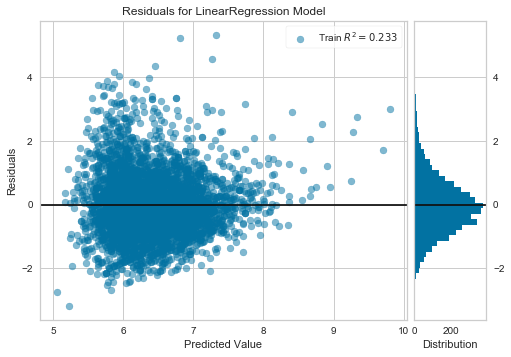

In [21]:
from yellowbrick.regressor import ResidualsPlot

y = df1['imdb_score'] 
X = df1[['duration','budget', 'G', 'PG', 'PG-13', 'R', 'Comedy', 'Drama', 'Thrill_Horror', 'Bio_Hist_Doc_War', 'actor_popularity', 'director_popularity']]

# Instantiate the linear model and visualizer
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

The residual plot above shows us that heteroskedasticity occurs
* this is represented by the funnel like shape of the residuals
* this tells us that a large portion of the data is not predicted by the linear model, and that non linear models should be explored.

### Ridge 

In [22]:
#Fit the model 
rig = lm.Ridge(alpha=.01)          
rig.fit(X, y)
rig_y = model1.predict(X)

In [23]:
#display coefficients and y intercept
print 'Coefficients: ', rig.coef_
print "y-intercept ", rig.intercept_

Coefficients:  [ 1.25703770e-02  1.01834557e-10 -2.16282122e-01 -5.37647537e-01
 -7.21742591e-01 -3.78318739e-01 -2.09913490e-01  3.74123686e-01
 -2.56503546e-01  9.51213076e-02  6.68860252e-02  8.84684403e-02]
y-intercept  5.09320393582218


In [24]:
#use regularization
coef = ["%.3f" % i for i in rig.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('duration', '0.013'),
 ('budget', '0.000'),
 ('G', '-0.216'),
 ('PG', '-0.538'),
 ('PG-13', '-0.722'),
 ('R', '-0.378'),
 ('Comedy', '-0.210'),
 ('Drama', '0.374'),
 ('Thrill_Horror', '-0.257'),
 ('Bio_Hist_Doc_War', '0.095'),
 ('actor_popularity', '0.067'),
 ('director_popularity', '0.088')]

Interestingly enough, regularization did not change our coefficients, even when the alpha variable was adjusted to be smaaller and larger. It appears as though budget is not a good variable to predict IMDB score.

In [25]:
print "mean square error: ", mean_squared_error(y, rig_y)
print "variance or r-squared: ", explained_variance_score(y, rig_y)

mean square error:  0.9377110285113476
variance or r-squared:  0.23331301118972603


Because our coefficients didn't change, ridge regression did not change the MSE or R-squared values.

### Lasso

* Lasso also uses regularization methods
* However, lasso also uses feature selection to determine which fatures are the most important.

In [26]:
#assigning columns to X and Y variables
y = df1['imdb_score'] 
X = df1[['duration','budget', 'G', 'PG', 'PG-13', 'R', 'Comedy', 'Drama', 'Thrill_Horror', 'Bio_Hist_Doc_War', 'actor_popularity', 'director_popularity']]

X = df1.drop(['imdb_score'], axis =1)

In [27]:
#Fit the model
model3 = lm.Lasso(alpha=0.1)            #higher alpha (penality parameter), fewer predictors
model3.fit(X, y)
model3_y = model3.predict(X)

In [28]:
#print the coefficients and the y intercept
print 'Coefficients: ', model3.coef_
print "y-intercept ", model3.intercept_

Coefficients:  [ 1.73498677e-02  3.09868716e-11  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  6.61222791e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
y-intercept  4.499396280224462


In [29]:
#show the coefficients after regualization and feature selection.
coef = ["%.3f" % i for i in model3.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('duration', '0.017'),
 ('budget', '0.000'),
 ('G', '0.000'),
 ('PG', '-0.000'),
 ('PG-13', '-0.000'),
 ('R', '0.000'),
 ('Comedy', '-0.000'),
 ('Drama', '0.066'),
 ('Thrill_Horror', '-0.000'),
 ('Bio_Hist_Doc_War', '0.000'),
 ('actor_popularity', '0.000'),
 ('director_popularity', '0.000')]

In [30]:
#sort the coefficients from highest to lowest
sorted(zip(coef, xcolumns), reverse=True)

[('0.066', 'Drama'),
 ('0.017', 'duration'),
 ('0.000', 'director_popularity'),
 ('0.000', 'budget'),
 ('0.000', 'actor_popularity'),
 ('0.000', 'R'),
 ('0.000', 'G'),
 ('0.000', 'Bio_Hist_Doc_War'),
 ('-0.000', 'Thrill_Horror'),
 ('-0.000', 'PG-13'),
 ('-0.000', 'PG'),
 ('-0.000', 'Comedy')]

In [31]:
#show sorted coefficients in a table
a= zip(xcolumns, coef)
df=pd.DataFrame(a)
df.sort_values(1, ascending=False)

,0,1
7,Drama,0.066
0,duration,0.017
1,budget,0.000
2,G,0.000
5,R,0.000
9,Bio_Hist_Doc_War,0.000
10,actor_popularity,0.000
11,director_popularity,0.000
3,PG,-0.000
4,PG-13,-0.000


This lasso method tells us that Drama and Duration are the most important variables in this model.

In [32]:
print "mean square error: ", mean_squared_error(y, model3_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  1.0442852132700577
variance or r-squared:  0.23331301118972603


With the lasso method our model performed worse than with ridge or linear regression.

### f_Regression (Feature Selection)

* f_regression is another method of feature selection
* Let's look for three variables

In [33]:
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[178.,   0.,   0.],
       [169.,   0.,   0.],
       [148.,   0.,   0.],
       ...,
       [ 84.,   1.,   0.],
       [ 95.,   1.,   0.],
       [ 90.,   0.,   1.]])

In [34]:
df1.tail(3)

,duration,budget,imdb_score,G,PG,PG-13,R,Comedy,Drama,Thrill_Horror,Bio_Hist_Doc_War,actor_popularity,director_popularity
4330,84.0,3250.0,7.8,0,0,1,0,0,1,0,0,1,2
4331,95.0,9000.0,6.4,0,0,0,0,1,1,0,0,2,1
4332,90.0,1100.0,6.6,0,1,0,0,0,0,0,1,1,2


f_regresion shows that duration, Darama, And Thrill_Horror are the three most important variables

In [35]:
# fit model using three variables f_variable chose (drmam, duration, thrill/horror)
model4 = lm.LinearRegression()
model4.fit(X_new, y)
model4_y = model4.predict(X_new)

print "mean square error: ", mean_squared_error(y, model4_y)
print "variance or r-squared: ", explained_variance_score(y, model4_y)

mean square error:  0.9965265694326932
variance or r-squared:  0.18522451847377597


This model has an MSE of .99 and a varience of .185. It is very inaccurate.

In [36]:
#run f_regression with two varaibles (drama, duration)
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
model5 = lm.LinearRegression()
model5.fit(X_new, y)
model5_y = model5.predict(X_new)

In [37]:
print "mean square error: ", mean_squared_error(y, model5_y)
print "variance or r-squared: ", explained_variance_score(y, model5_y)

mean square error:  1.0015860452167162
variance or r-squared:  0.18108781309667366


Using 2 variables is less accurate than using 3.

### Recursive Feature Selection

* Let's see if recursive feature selection helps with feature selection

In [38]:
#run recursive feature selection
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns)) 

Features sorted by their rank:
[(1, 'Comedy'), (1, 'Drama'), (2, 'Thrill_Horror'), (3, 'PG-13'), (4, 'PG'), (5, 'R'), (6, 'G'), (7, 'Bio_Hist_Doc_War'), (8, 'director_popularity'), (9, 'actor_popularity'), (10, 'duration'), (11, 'budget')]


Interestingly, recursive feature selection ranked Comedy, Drama, and Thrill_Horror as the number 1 most important variables.

### Random Forest for Feature Selection

* Random forrest is another feature selection model

In [39]:
#import random forrest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = df1['imdb_score'] 
X = df1[['duration','budget', 'G', 'PG', 'PG-13', 'R', 'Comedy', 'Drama', 'Thrill_Horror', 'Bio_Hist_Doc_War', 'actor_popularity', 'director_popularity']]
X = df1.drop(['imdb_score'], axis =1)

#run the model
regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

#print coefficient and y intercept
print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.17972935262759615
variance or r-squared:  0.8532068019909884


This model resulted in an R-squared of .85 which means the model is 85% accurate in predicting IMDB score. The mean square error is .18, which is also relatively low. This means that on average the error of this model is .18, so if the score is 5, the model will most likely predict within 4.82 and 5.18.

In [40]:
#list the coefficients
sorted(zip(regr.feature_importances_, X.columns))

[(0.011844842470369108, 'G'),
 (0.01568041835843737, 'PG'),
 (0.019860724204540672, 'R'),
 (0.025730514958458427, 'PG-13'),
 (0.028000604821214393, 'Comedy'),
 (0.028640864700906626, 'Bio_Hist_Doc_War'),
 (0.044453192892667526, 'Thrill_Horror'),
 (0.05323137755075917, 'Drama'),
 (0.07271682040152982, 'director_popularity'),
 (0.08287014795932876, 'actor_popularity'),
 (0.27232005892260125, 'budget'),
 (0.3446504327591869, 'duration')]

In this model the imporance of variables is very different. The top variables are:
* duration
* budget
* actor_popularity
* director popularity
* Drama

The model can be rerun with these variables

In [41]:
#define x and y
y = df1['imdb_score'] 
X = df1[['duration','budget', 'Drama', 'actor_popularity', 'director_popularity']]

#fit the model
regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

#print the coefficients and y intercept
print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.2063862747908918
variance or r-squared:  0.8313248405908475


The accuracy of this model is still very high with an r-squared of .83 and a MSE of .206

In [42]:
#display feature importance
sorted(zip(regr.feature_importances_, X.columns))

[(0.0568794741693894, 'Drama'),
 (0.08122737761723024, 'director_popularity'),
 (0.10094260023650428, 'actor_popularity'),
 (0.3534886531465755, 'budget'),
 (0.4074618948303006, 'duration')]

* duration, budget, and actor popularity are the most important variables in this model

In [43]:
#define x and y
y = df1['imdb_score'] 
X = df1[['duration','budget', 'actor_popularity', 'director_popularity']]

#fit the model
regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

#print the coefficients and y intercept
print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.22436545710433742
variance or r-squared:  0.816586063834304


#### The most accurate model we used in this section was Random Forest with a prediction accuracy of 85.3% with all the variables included.

#### When the model is reduced to four variables: duration, budget, actor popularity, and director popularity the model is 81.7% accurate